In [ ]:
#this is a first look at the elevation transects. # this will plot
#all the transects for a year and the top down view. It also has the code for if the 
#thredds data is available and this can work form files predownloded on the local machine

In [1]:
from netCDF4 import Dataset, num2date 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.dates as dates
from datetime import datetime
import matplotlib as mpl
import netCDF4 as nc4
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#use this cell and skip 2 cells if the threads server is working
#frftran=Dataset("https://chldata.erdc.dren.mil/thredds/dodsC/frf/geomorphology/elevationTransects/survey/surveyTransects.ncml")
#print(frftran)

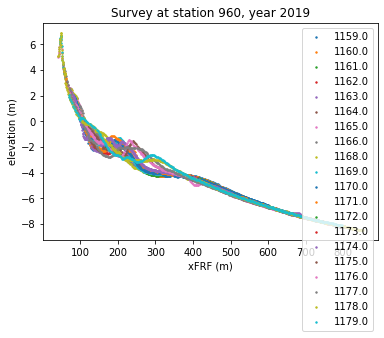

TypeError: 'AxesSubplot' object is not subscriptable

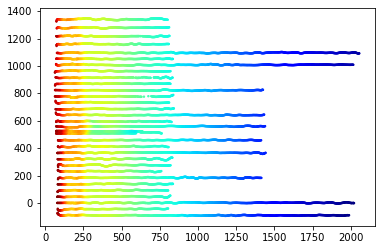

In [2]:
# if the threads server is not working download the needed data and run the this and the next box
import os
files = os.listdir("C:/Users/laure/OneDrive/Documents/ERDC_FRF/survey")   
    
filefull=["C:/Users/laure/OneDrive/Documents/ERDC_FRF/survey/" + i for i in files]
firstDataset = nc4.Dataset(filefull[0])
#print(filefull[0])
#print(filefull[-1])
elv = []
time = []
xfrf=[]
yfrf=[]
pnum=[]
snum=[]
x960 = []
elv960 = []
s960 = []

#p,axs = plt.subplots(1,1)

for i, val in enumerate(filefull):
    currDataset = nc4.Dataset(val)
    time.append(np.array(currDataset['time'][:]))
    xfrf.append(np.array(currDataset['xFRF'][:]))
    yfrf.append(np.array(currDataset['yFRF'][:]))
    pnum.append(np.array(currDataset['profileNumber'][:]))
    inds = np.where(pnum[i]==960) #survey of interest
    snum.append(np.array(currDataset['surveyNumber'][0]))
    elv.append(np.array(currDataset['elevation'][:]))
    x960.append(xfrf[i][inds])
    s960.append(snum[i])
    elv960.append(elv[i][inds])
    plt.scatter(x960[i],elv960[i],s=2,label=str(s960[i]))#plot elevation profile for this survey
    plt.xlabel('xFRF (m)')
    plt.ylabel('elevation (m)')
    plt.title('Survey at station 960, year 2019')
    plt.legend()
    


plt.show()

#plot the top view of all surveys in a month
fig=plt.figure()
norm=mpl.cm.colors.Normalize(vmax=np.amax(elv[0]),vmin=np.amin(elv[0]))

ax0 = fig.add_subplot(1, 1, 1)
plt.scatter(xfrf[0],yfrf[0],2,elv[0],norm=norm,cmap='jet')
ax0[0].set_xlabel('xFRF (m)')
ax0[0].set_ylabel('yFRF (m)')
cbar=fig.colorbar(mpl.cm.ScalarMappable(norm=norm,cmap='jet'),ax=ax0[0])
cbar.set_label('depth (m)')


ax0[0].set_title("Surveys in Jan 2019")
plt.show()


TypeError: 'AxesSubplot' object is not subscriptable

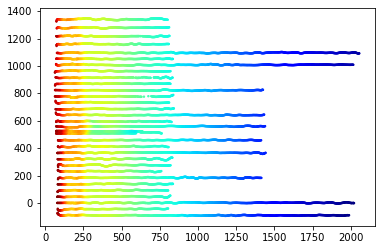

In [20]:
#other block if thredds is not working
fig=plt.figure()
norm=mpl.cm.colors.Normalize(vmax=np.amax(elv[0]),vmin=np.amin(elv[0]))

ax0 = fig.add_subplot(1, 1, 1)
plt.scatter(xfrf[0],yfrf[0],2,elv[0],norm=norm,cmap='jet')
ax0[0].set_xlabel('xFRF (m)')
ax0[0].set_ylabel('yFRF (m)')
cbar=fig.colorbar(mpl.cm.ScalarMappable(norm=norm,cmap='jet'),ax=ax0[0])
cbar.set_label('depth (m)')




ax0[0].set_title("Surveys in Jan 2019")
plt.show()


In [1]:
#yay the thredds server is working you can start here
tt=frftran['time']
print(findstation)
dtstart=datetime(2020, 1, 1, 0, 0, 0)
dtend=datetime(2021, 1, 1, 0, 0, 0)
timedm=num2date(tt[:],units=tt.units,only_use_cftime_datetimes=False,only_use_python_datetimes=True)
dnstart = dates.date2num(dtstart)
dnend = dates.date2num(dtend)
ptime= dates.date2num(timedm)
dates = (ptime >= dnstart) & (ptime <= dnend)
x=len(dates)
print(x)
print(dates[:5])

NameError: name 'frftran' is not defined

In [ ]:
snum=frftran['surveyNumber']
pnum=frftran['profileNumber']
xfrf=frftran['xFRF']
yfrf=frftran['yFRF']
time=frftran['time']
elv=frftran['elevation']
time2020= time[dates]
print(time2020[:3])
survey2020 = snum[dates] #survey numbers for the year 2020
pnum2020 = pnum[dates] #locations surveyed in 2020
xfrf2020=xfrf[dates]
yfrf2020=yfrf[dates]
elv2020=elv[dates]
print(elv2020[:10])

In [ ]:

findstation=np.where(pnum2020 == 960) #index of places that are at location 960
station960= pnum2020[findstation] #check to see if correct all values = 960

In [ ]:
xloc=xfrf2020[findstation]
yloc=yfrf2020[findstation]
time960=time2020[findstation]

In [ ]:
plt.scatter(xloc,yloc)
plt.xlabel('xFRF (m)')
plt.ylabel('yFRF (m)')
plt.title("Survey 960 in the year 2020")

In [ ]:
elv960=elv2020[findstation]
#plt.xlabel('xFRF (m)')
#plt.ylabel('yFRF (m)')
#clb = plt.colorbar()
#t4=num2date(storm2t,units=waves['time'].units,only_use_cftime_datetimes=False,only_use_python_datetimes=True)
#clb.set_label('depth (m)')
#plt.title("Survey 960 in the year 2020")
survey960=survey2020[findstation]

In [ ]:
plt.scatter(xloc,elv960,2,survey960)
plt.xlabel('xFRF (m)')
plt.ylabel('elevation (m)')
clb = plt.colorbar()
clb.set_label('Survey')
plt.title("elevation profile for 960")

In [ ]:
print(elv960)

In [ ]:
plt.scatter(xloc,yloc,2,elv960)
plt.xlabel('xFRF (m)')
plt.ylabel('yFRF (m)')
clb = plt.colorbar()
clb.set_label('depth (m)')
plt.title("Survey 960 in the year 2020")

In [ ]:
plt.scatter(xloc,yloc,2,time960)
plt.xlabel('xFRF (m)')
plt.ylabel('yFRF (m)')
clb = plt.colorbar()
#t4=num2date(storm2t,units=waves['time'].units,only_use_cftime_datetimes=False,only_use_python_datetimes=True)
clb.set_label('depth (m)')
plt.title("Survey 960 in the year 2020")

In [ ]:
from netCDF4 import Dataset, date2num 
import matplotlib.dates as dates
tt2=frftran['time']
timedm2=num2date(tt2[:],units=tt2.units,only_use_cftime_datetimes=False,only_use_python_datetimes=True)
dtstart2=datetime(2020, 1, 1, 0, 0, 0)
dtend2=datetime(2020, 2, 1, 0, 0, 0)
dnstart2 = dates.date2num(dtstart2)
dnend2 = dates.date2num(dtend2)
pytime= dates.date2num(timedm2)
jan = (pytime >= dnstart2) & (pytime <= dnend2)
z=len(jan)
print(z)


In [ ]:
print(tt2[:])
print(tt2[-3:])
print(dtstart2)
print(dtend2)
print(dtend2-dtstart2)

In [ ]:
timejan= time[jan]
surveyjan = snum[jan] #survey numbers for the year 2020
pnumjan = pnum[jan] #locations surveyed in 2020
xfrfjan=xfrf[jan]
yfrfjan=yfrf[jan]
elvjan=elv[jan]
print(xfrfjan)

In [ ]:
fig=plt.figure()
norm=mpl.cm.colors.Normalize(vmax=np.amax(elvjan),vmin=np.amin(elvjan))

ax0 = fig.add_subplot(1, 1, 1), plt.scatter(xfrfjan,yfrfjan,2,elvjan,norm=norm,cmap='jet')
ax0[0].set_xlabel('xFRF (m)')
ax0[0].set_ylabel('yFRF (m)')
cbar=fig.colorbar(mpl.cm.ScalarMappable(norm=norm,cmap='jet'),ax=ax0[0])
cbar.set_label('depth (m)')


ax0[0].set_title("Surveys in the Jan 2020")
plt.show()